<a href="https://colab.research.google.com/github/AmitG-98/MSc-Data-Science-Final-Project/blob/main/Global_macro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Global Macroeconomic Indicator Dashboard with Predictive Analytics**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install Dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 66.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 21.6 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from prophet import Prophet
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import plotly.express as px
from dash import Dash, html, dcc, Input, Output
from tabulate import tabulate
from sklearn.linear_model import LinearRegression

In [4]:
""" To see weather te data set is working we will try to read data set"""
df = pd.read_csv('/content/drive/MyDrive/Msc Data Science Final Project/Raw Data sets/GDP Growth.csv')
df.head()

ParserError: Error tokenizing data. C error: Expected 3 fields in line 5, saw 69


In [5]:
""" Here we have written a funtion incoomon for all data sets to clean them """
def clean_csv(file_path, cleaned_file_path):
    """
    Cleans a CSV file by removing metadata, ensuring consistent column counts,
    and handling encoding issues like BOM.

    Args:
        file_path (str): Path to the input CSV file.
        cleaned_file_path (str): Path to save the cleaned CSV file.
    """
    # Step 1: Open and read the raw content of the file
    with open(file_path, 'r', encoding='utf-8') as file:
        raw_content = file.readlines()

    # Step 2: Remove empty lines and whitespace
    cleaned_content = [line.strip() for line in raw_content if line.strip()]

    # Step 3: Identify the header row (adjust "Header Keyword" as needed)
    header_index = next((i for i, line in enumerate(cleaned_content) if "Country Name" in line), 0)

    # Extract the actual data starting from the header row
    cleaned_content = cleaned_content[header_index:]

    # Step 4: Save the cleaned content back to a CSV file
    with open(cleaned_file_path, 'w', encoding='utf-8') as file:
        file.write("\n".join(cleaned_content))

    # Step 5: Load the cleaned CSV to ensure consistency
    try:
        data = pd.read_csv(cleaned_file_path)
        print("Dataset preview:")
        print(data.head())  # Preview cleaned data
        print("\nDataset info:")
        print(data.info())  # Check structure and missing values

        # Optionally save the cleaned dataset again
        data.to_csv(cleaned_file_path, index=False)
        print(f"Cleaned CSV saved to: {cleaned_file_path}")
    except Exception as e:
        print(f"Error reading cleaned file: {e}")

In [6]:
"""Gdp Growth"""
# Specify file paths
file_path = "/content/drive/MyDrive/Msc Data Science Final Project/Raw Data sets/GDP Growth.csv"  # Path to your raw CSV file
cleaned_file_path = "/content/drive/MyDrive/Msc Data Science Final Project/Cleaned data sets/GDP Growth(c).csv"  # Output path for cleaned file

# Call the cleaning function
clean_csv(file_path, cleaned_file_path)

"""unemployment"""
# Specify file paths
file_path = "/content/drive/MyDrive/Msc Data Science Final Project/Raw Data sets/Unemployment.csv"  # Path to your raw CSV file
cleaned_file_path = "/content/drive/MyDrive/Msc Data Science Final Project/Cleaned data sets/Unemployment(c).csv"  # Output path for cleaned file

# Call the cleaning function
clean_csv(file_path, cleaned_file_path)

"""Real interest rate"""
# Specify file paths
file_path = "/content/drive/MyDrive/Msc Data Science Final Project/Raw Data sets/Real Interest rate.csv"  # Path to your raw CSV file
cleaned_file_path = "/content/drive/MyDrive/Msc Data Science Final Project/Cleaned data sets/Real Interest rate(c).csv"  # Output path for cleaned file

# Call the cleaning function
clean_csv(file_path, cleaned_file_path)

"""Inflation"""
# Specify file paths
file_path = "/content/drive/MyDrive/Msc Data Science Final Project/Raw Data sets/Inflation ,Consumer.csv"  # Path to your raw CSV file
cleaned_file_path = "/content/drive/MyDrive/Msc Data Science Final Project/Cleaned data sets/Inflation(c).csv"  # Output path for cleaned file

# Call the cleaning function
clean_csv(file_path, cleaned_file_path)


"""Houseold"""
# Specify file paths
file_path = "/content/drive/MyDrive/Msc Data Science Final Project/Raw Data sets/Houseolld final consmption.csv"  # Path to your raw CSV file
cleaned_file_path = "/content/drive/MyDrive/Msc Data Science Final Project/Cleaned data sets/Houseolld(c).csv"  # Output path for cleaned file

# Call the cleaning function
clean_csv(file_path, cleaned_file_path)

"""Stock Data"""
# Specify file paths
file_path = "/content/drive/MyDrive/Msc Data Science Final Project/Raw Data sets/stock data.csv"  # Path to your raw CSV file
cleaned_file_path = "/content/drive/MyDrive/Msc Data Science Final Project/Cleaned data sets/stock(c).csv"  # Output path for cleaned file

# Call the cleaning function
clean_csv(file_path, cleaned_file_path)

"""CPIA"""
# Specify file paths
file_path = "/content/drive/MyDrive/Msc Data Science Final Project/Raw Data sets/CPIA.csv"  # Path to your raw CSV file
cleaned_file_path = "/content/drive/MyDrive/Msc Data Science Final Project/Cleaned data sets/CPIA(c).csv"  # Output path for cleaned file

# Call the cleaning function
clean_csv(file_path, cleaned_file_path)

Dataset preview:
                  Country Name Country Code         Indicator Name  \
0                        Aruba          ABW  GDP growth (annual %)   
1  Africa Eastern and Southern          AFE  GDP growth (annual %)   
2                  Afghanistan          AFG  GDP growth (annual %)   
3   Africa Western and Central          AFW  GDP growth (annual %)   
4                       Angola          AGO  GDP growth (annual %)   

      Indicator Code  1960      1961      1962      1963      1964      1965  \
0  NY.GDP.MKTP.KD.ZG   NaN       NaN       NaN       NaN       NaN       NaN   
1  NY.GDP.MKTP.KD.ZG   NaN  0.460106  7.868013  5.616400  4.668135  5.138990   
2  NY.GDP.MKTP.KD.ZG   NaN       NaN       NaN       NaN       NaN       NaN   
3  NY.GDP.MKTP.KD.ZG   NaN  1.873455  3.707643  7.145784  5.406403  4.102491   
4  NY.GDP.MKTP.KD.ZG   NaN       NaN       NaN       NaN       NaN       NaN   

   ...      2015      2016      2017      2018      2019       2020  \
0  ... -0.

In [7]:


# Paths of the datasets
dataset_paths = [
    "/content/drive/MyDrive/Msc Data Science Final Project/Cleaned data sets/CPIA(c).csv",
    "/content/drive/MyDrive/Msc Data Science Final Project/Cleaned data sets/GDP Growth(c).csv",
    "/content/drive/MyDrive/Msc Data Science Final Project/Cleaned data sets/Houseolld(c).csv",
    "/content/drive/MyDrive/Msc Data Science Final Project/Cleaned data sets/Inflation(c).csv",
    "/content/drive/MyDrive/Msc Data Science Final Project/Cleaned data sets/Real Interest rate(c).csv",
    "/content/drive/MyDrive/Msc Data Science Final Project/Cleaned data sets/Unemployment(c).csv",
    "/content/drive/MyDrive/Msc Data Science Final Project/Cleaned data sets/stock(c).csv",

]

# Columns to drop
columns_to_drop = ['Country Code', 'Indicator Name', 'Indicator Code', 'Unnamed: 68']
years_to_drop = [str(year) for year in range(1960, 1990)]  # Drop years before 1990

# Create an empty list to store the cleaned datasets
dataframes = []

# Process each dataset
for path in dataset_paths:
    df = pd.read_csv(path)

    # Drop unnecessary columns
    df = df.drop(columns=columns_to_drop + years_to_drop, errors='ignore')

    # Get the list of countries present in the current dataset
    countries_in_data = df['Country Name'].unique()

    # Optional: If you want to filter for certain countries, you can set the list of countries here
    # all_countries = ['Country1', 'Country2', 'Country3', ...]
    # df = df[df['Country Name'].isin(all_countries)]

    # Calculate the percentage of missing values for each country
    missing_percentage = df.isnull().mean(axis=1)

    # Define a threshold for dropping countries (e.g., remove countries with > 30% missing data)
    threshold = 0.3  # 30% missing data
    df = df[missing_percentage <= threshold]

    # Reset index after dropping rows
    df.reset_index(drop=True, inplace=True)

    # Add a source column for identifying the dataset
    df['Indicator'] = path.split("/")[-1].replace("(c).csv", "")

    # Append the cleaned dataframe to the list
    dataframes.append(df)

# Combine all datasets into a single dataframe
combined_df = pd.concat(dataframes, ignore_index=True)

# Save the combined dataset
output_path = "/content/drive/MyDrive/Msc Data Science Final Project/Cleaned data sets/Combined_Dataset.csv"
combined_df.to_csv(output_path, index=False)

# Display the first few rows of the combined dataset
combined_df.head()


,Country Name,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Indicator
0,Aruba,3.961402,7.962872,5.882354,7.307693,8.203901,2.547144,1.185789,7.046875,1.991984,...,-0.623626,1.719625,7.048533,2.381730,-2.302836,-23.982581,27.639357,10.458317,NaN,GDP Growth
1,Africa Eastern and Southern,0.182031,-0.092709,-2.355109,-0.591581,1.899017,4.283193,5.454772,3.838778,1.758375,...,3.011572,2.183581,2.651400,2.681718,2.189259,-2.780379,4.497380,3.554422,2.622310,GDP Growth
2,Africa Western and Central,5.773828,1.009365,2.483663,-1.317609,-0.323481,1.919113,4.649809,4.447027,3.609312,...,2.813979,0.141489,2.284961,2.842645,3.222029,-1.004417,3.994854,3.784486,3.342776,GDP Growth
3,Angola,-3.450099,0.991359,-5.838281,-23.983417,1.339363,15.000000,13.544370,7.274277,4.691146,...,0.943572,-2.580111,-0.147150,-1.316362,-0.702273,-5.638215,1.199211,3.045403,0.856001,GDP Growth
4,Albania,-9.575640,-28.002142,-7.187111,9.559412,8.302867,13.322333,9.099999,-10.919984,8.829424,...,2.218726,3.314981,3.802599,4.019346,2.087712,-3.302082,8.908528,4.856402,3.439149,GDP Growth


In [9]:


# Load your dataset
file_path = '/content/drive/MyDrive/Msc Data Science Final Project/Cleaned data sets/Combined_Dataset.csv'  # Replace with your file path
df = pd.read_csv(file_path)

# Method 1: Fill missing values with mean (Mean Imputation)
df_mean_imputed = df.copy()

# Apply mean imputation only to numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns
df_mean_imputed[numeric_columns] = df_mean_imputed[numeric_columns].fillna(df[numeric_columns].mean())

# Save the mean-imputed dataset
mean_imputation_path = '/content/drive/MyDrive/Msc Data Science Final Project/Preprocessed data sets/mean_imputed_dataset.csv'
df_mean_imputed.to_csv(mean_imputation_path, index=False)

print(f"Mean imputed dataset saved to: {mean_imputation_path}")

# Method 2: Fill missing values by searching for same sequence rows in the same indicator
df_sequence_imputed = df.copy()

# Define a function to fill missing values by sequence matching
def fill_missing_by_sequence(df, column):
    for idx, value in df[column].items():
        if pd.isna(value):  # If the value is missing
            # Find rows with the same indicator and not missing in the target column
            indicator = df.loc[idx, 'Indicator']  # Assuming there's an 'Indicator' column
            similar_rows = df[(df['Indicator'] == indicator) & (~df[column].isna())]

            if not similar_rows.empty:
                # Use the mean of the matching rows to fill the missing value
                df.at[idx, column] = similar_rows[column].mean()

# Apply the function to each numeric column (except the 'Indicator' column)
for col in numeric_columns:
    fill_missing_by_sequence(df_sequence_imputed, col)

# Save the sequence-matched dataset
sequence_imputation_path = '/content/drive/MyDrive/Msc Data Science Final Project/Preprocessed data sets/sequence_imputed_dataset.csv'
df_sequence_imputed.to_csv(sequence_imputation_path, index=False)

print(f"Sequence-imputed dataset saved to: {sequence_imputation_path}")


Mean imputed dataset saved to: /content/drive/MyDrive/Msc Data Science Final Project/Preprocessed data sets/mean_imputed_dataset.csv
Sequence-imputed dataset saved to: /content/drive/MyDrive/Msc Data Science Final Project/Preprocessed data sets/sequence_imputed_dataset.csv


In [24]:


# Load the dataset
file_path = '/content/drive/MyDrive/Msc Data Science Final Project/Preprocessed data sets/sequence_imputed_dataset.csv'  # Replace with the correct path
df = pd.read_csv(file_path)

# Ensure the dataset contains 'Country' and 'Indicator' columns
if 'Country Name' not in df.columns or 'Indicator' not in df.columns:
    raise ValueError("Dataset must contain 'Country Name' and 'Indicator' columns.")

# Group by 'Indicator' and collect unique countries for each indicator
indicator_countries = df.groupby('Indicator')['Country Name'].apply(set)

# Find the intersection of countries across all indicators
common_countries = set.intersection(*indicator_countries)

# Convert to a sorted list for better readability
common_countries = sorted(common_countries)


# Save the list of common countries to a CSV file
output_path = '/content/drive/MyDrive/Msc Data Science Final Project/common_countries_Across_indicators.csv'
pd.DataFrame({'Country': common_countries}).to_csv(output_path, index=False)

print(f"Countries available in all indicators saved to: {output_path}")


Countries available in all indicators saved to: /content/drive/MyDrive/Msc Data Science Final Project/common_countries_Across_indicators.csv


In [25]:
# Print the list of common countries in table format
print("\ncommon_countries_across_indicators:\n")
print(tabulate([[country] for country in common_countries], headers=["Country"], tablefmt="grid"))


common_countries_across_indicators:

+----------------------+
| Country              |
+======================+
| Australia            |
+----------------------+
| Bahrain              |
+----------------------+
| Bangladesh           |
+----------------------+
| Brazil               |
+----------------------+
| Bulgaria             |
+----------------------+
| Canada               |
+----------------------+
| Chile                |
+----------------------+
| China                |
+----------------------+
| Colombia             |
+----------------------+
| Costa Rica           |
+----------------------+
| Czechia              |
+----------------------+
| Hong Kong SAR, China |
+----------------------+
| Indonesia            |
+----------------------+
| Italy                |
+----------------------+
| Japan                |
+----------------------+
| Jordan               |
+----------------------+
| Kenya                |
+----------------------+
| Korea, Rep.          |
+-----------

In [55]:
# Load the dataset
file_path = '/content/drive/MyDrive/Msc Data Science Final Project/Preprocessed data sets/sequence_imputed_dataset.csv'  # Replace with the correct path
df = pd.read_csv(file_path)

# Ensure the dataset contains 'Country' and 'Indicator' columns
if 'Country Name' not in df.columns or 'Indicator' not in df.columns:
    raise ValueError("Dataset must contain 'Country Name' and 'Indicator' columns.")

# Define the indicators of interest
indicators_of_interest = ['GDP Growth', 'Inflation', 'Unemployment', 'Real Interest Rate','houseolld']

# Filter the dataset for the selected indicators
filtered_df = df[df['Indicator'].isin(indicators_of_interest)]

# Group by 'Indicator' and collect unique countries for each indicator
indicator_countries = filtered_df.groupby('Indicator')['Country Name'].apply(set)

# Find the intersection of countries across the selected indicators
common_countries = set.intersection(*indicator_countries)

# Convert to a sorted list for better readability
common_countries = sorted(common_countries)

# Save the list of common countries to a CSV file
output_path = '/content/drive/MyDrive/Msc Data Science Final Project/common_countries_selected_indicators.csv'
pd.DataFrame({'Country': common_countries}).to_csv(output_path, index=False)

# Filter the dataset for the selected indicators
filtered_df = df[df['Indicator'].isin(indicators_of_interest)]
# Economic classification of countries (sample data; update with actual classifications)
economic_classification = {
    'Developed': ['United States', 'Germany', 'United Kingdom', 'Canada', 'Japan', 'Australia', 'France'],
    'Developing': ['India', 'China', 'Brazil', 'South Africa', 'Indonesia', 'Mexico', 'Turkey','Bangladesh'],
    'Underdeveloped': ['Afghanistan', 'Haiti', 'Somalia', 'Chad', 'Nigeria', 'South Sudan', 'Yemen','Colombia','Peru','Slovenia','Panama','Kenya','Ghana','Malta  ']
}

# Categorize the shortlisted countries
categorized_countries = {
    'Developed': [],
    'Developing': [],
    'Underdeveloped': []
}

for country in common_countries:
    for category, country_list in economic_classification.items():
        if country in country_list:
            categorized_countries[category].append(country)
            break

# Print the categorized countries in table format
print("\nCategorized Countries:\n")
for category, countries in categorized_countries.items():
    print(f"\n{category} Economies:\n")
    print(tabulate([[country] for country in sorted(countries)], headers=["Country"], tablefmt="grid"))


Categorized Countries:


Developed Economies:

+----------------+
| Country        |
+================+
| Australia      |
+----------------+
| Canada         |
+----------------+
| France         |
+----------------+
| Germany        |
+----------------+
| Japan          |
+----------------+
| United Kingdom |
+----------------+
| United States  |
+----------------+

Developing Economies:

+--------------+
| Country      |
+==============+
| Bangladesh   |
+--------------+
| Brazil       |
+--------------+
| China        |
+--------------+
| India        |
+--------------+
| Indonesia    |
+--------------+
| Mexico       |
+--------------+
| South Africa |
+--------------+

Underdeveloped Economies:

+-----------+
| Country   |
+===========+
| Chad      |
+-----------+
| Colombia  |
+-----------+
| Ghana     |
+-----------+
| Haiti     |
+-----------+
| Kenya     |
+-----------+
| Nigeria   |
+-----------+
| Panama    |
+-----------+
| Peru      |
+-----------+
| Slovenia  |
+-------

In [38]:
developed_countries = ["United States","Japan", "United Kingdom", "Canada","Australia"]
developing_countries = ["Brazil", "China", "South Africa", "Indonesia", "Mexico"]
least_developed_countries=["Colombia","Peru","Panama","Kenya"]

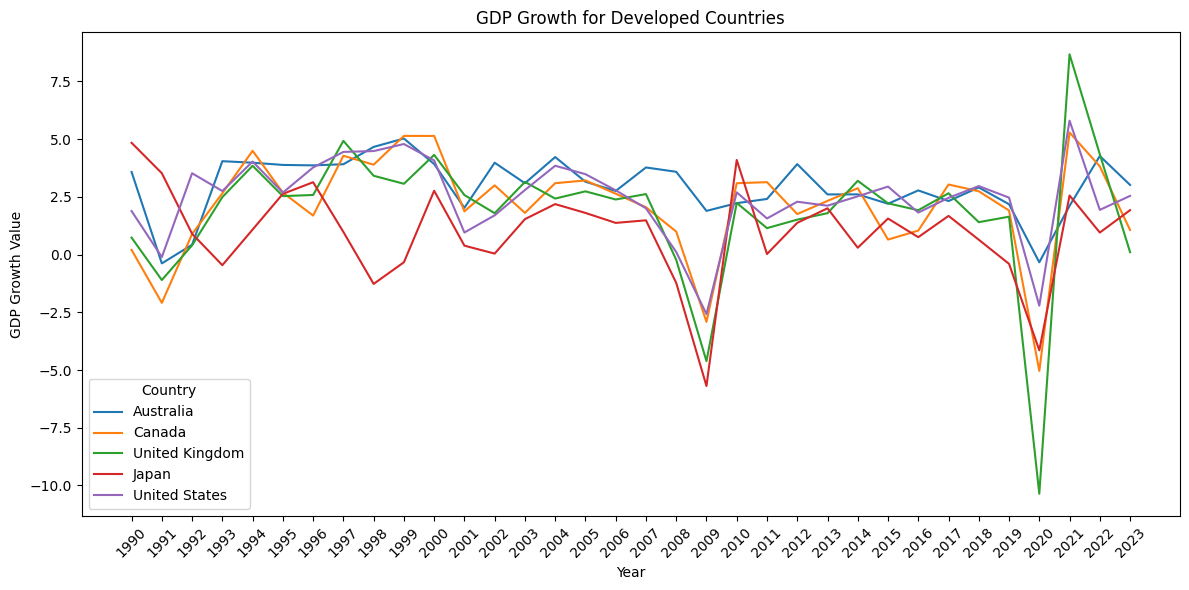

In [43]:

# Filter the dataset for developed countries and 'GDP Growth' indicator
df_developed = df[(df['Country Name'].isin(developed_countries)) & (df['Indicator'] == 'GDP Growth')]

# Reshape the data for plotting
df_developed_melted = df_developed.melt(id_vars=['Country Name', 'Indicator'], var_name='Year', value_name='Value')

# Create the plot
plt.figure(figsize=(12, 6))
for country in df_developed_melted['Country Name'].unique():
    country_data = df_developed_melted[df_developed_melted['Country Name'] == country]
    plt.plot(country_data['Year'], country_data['Value'], label=country)

# Customize the plot
plt.xlabel('Year')
plt.ylabel('GDP Growth Value')
plt.title('GDP Growth for Developed Countries')
plt.xticks(rotation=45)
plt.legend(title='Country')
plt.tight_layout()

# Display the plot
plt.show()

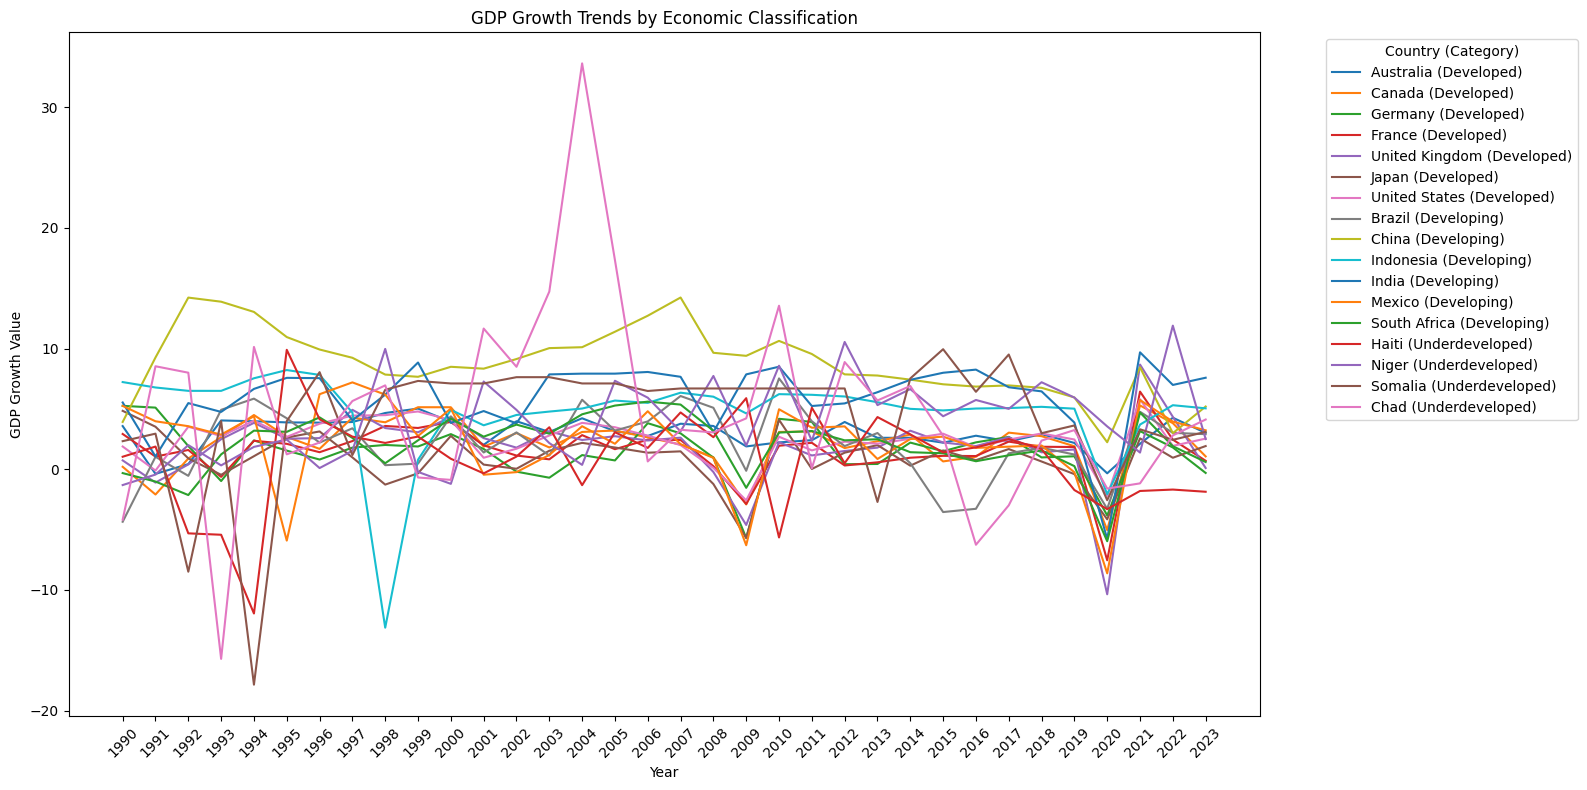

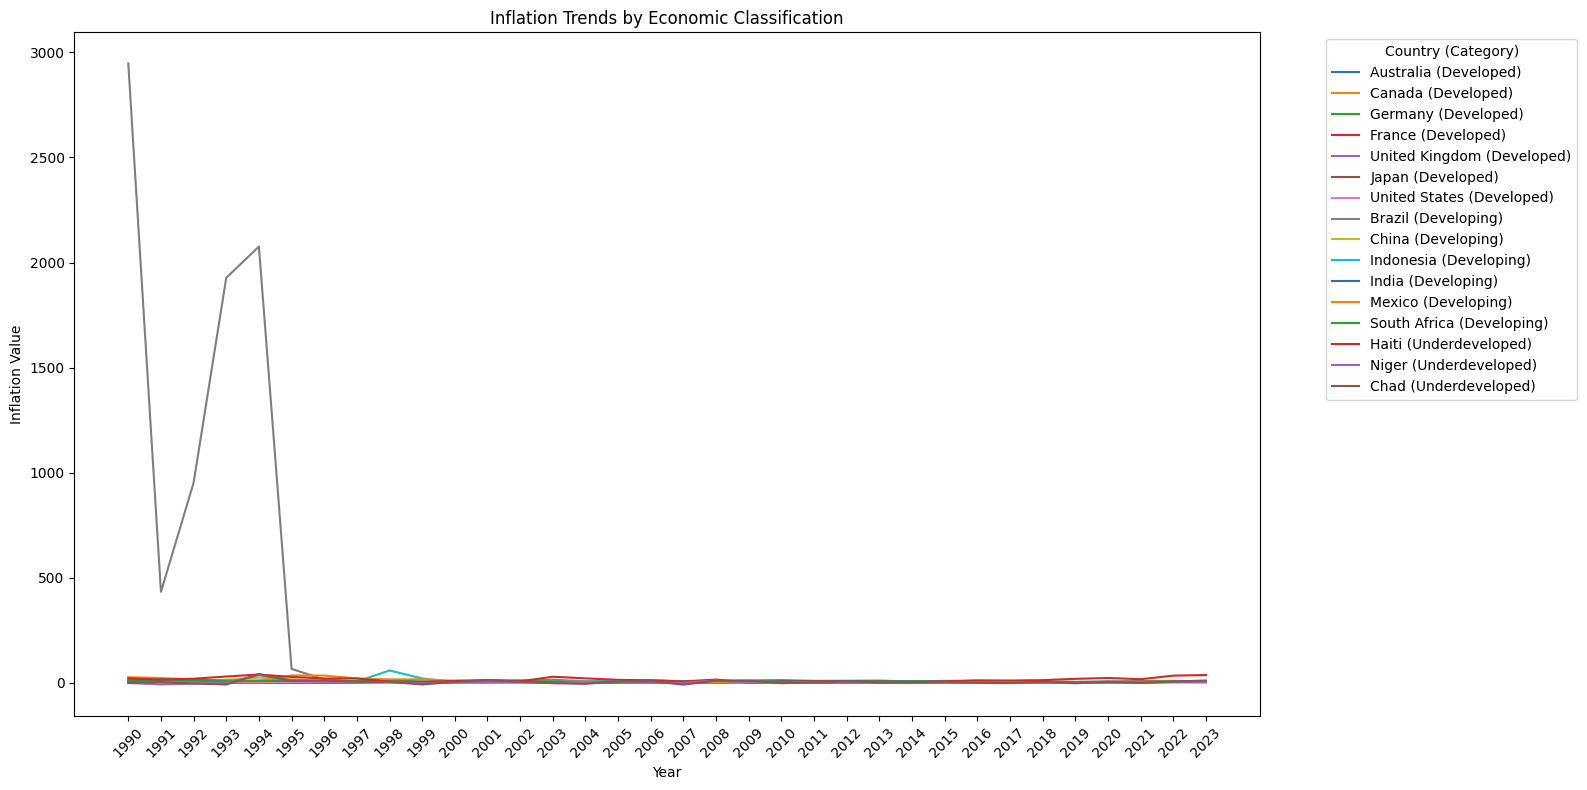

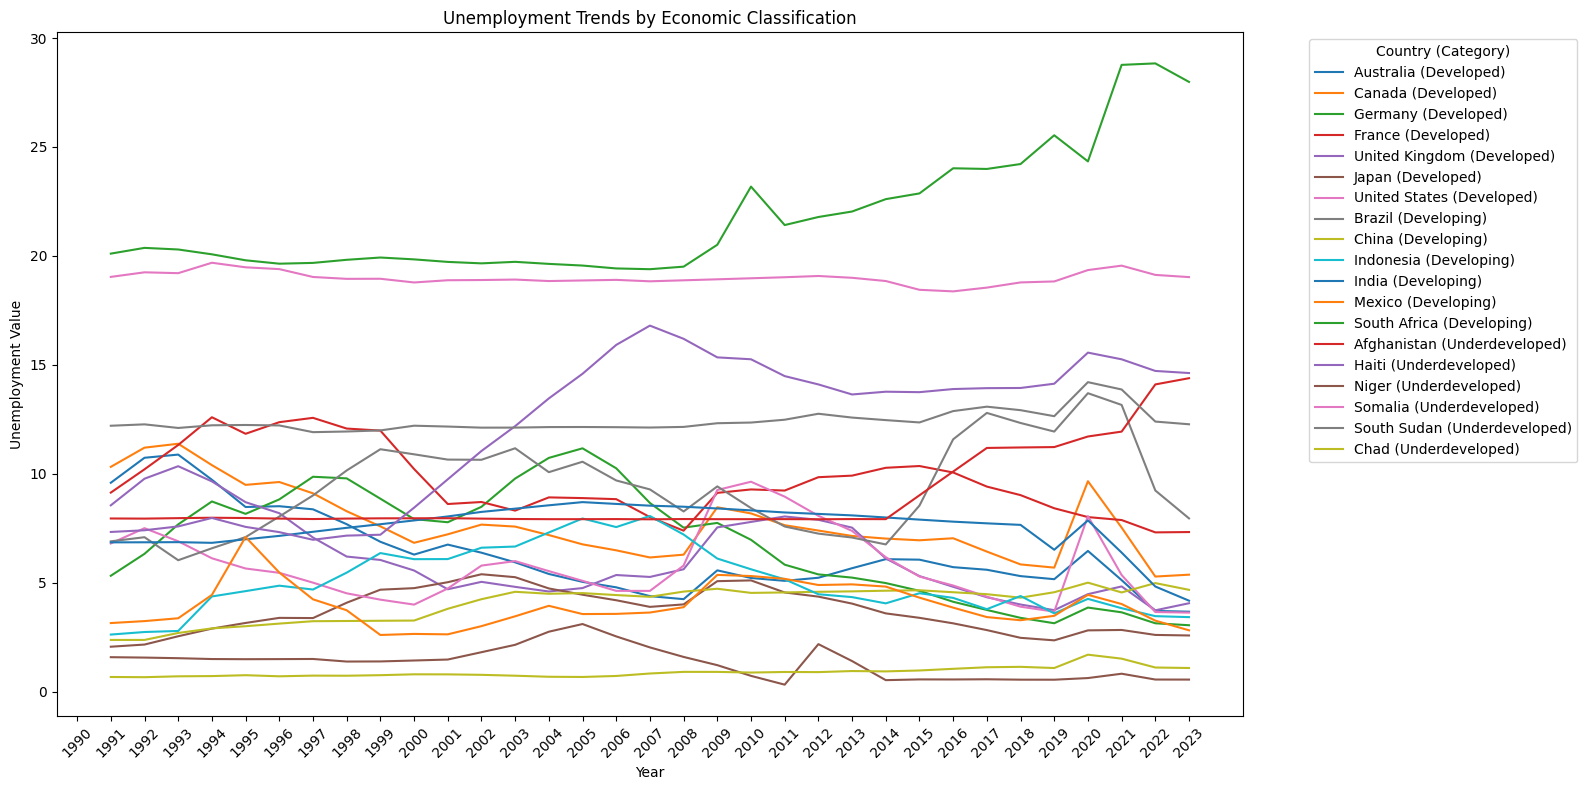

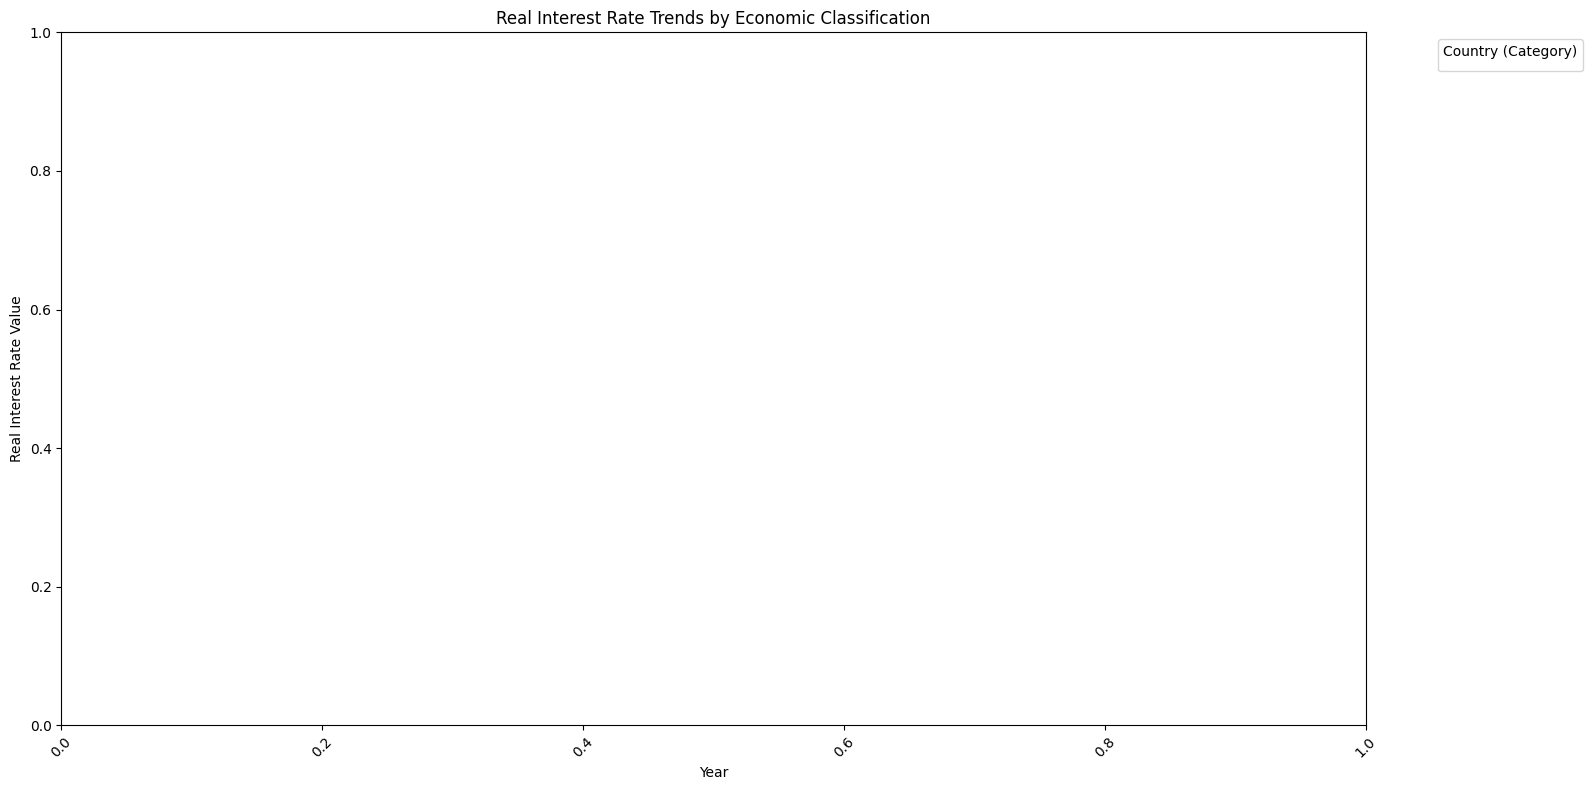

In [56]:


# Load the dataset
file_path = '/content/drive/MyDrive/Msc Data Science Final Project/Preprocessed data sets/sequence_imputed_dataset.csv'  # Replace with the correct path
df = pd.read_csv(file_path)

# Ensure the dataset contains necessary columns
if 'Country Name' not in df.columns or 'Indicator' not in df.columns:
    raise ValueError("Dataset must contain 'Country Name' and 'Indicator' columns.")

# Define the economic classifications
economic_classification = {
    'Developed': ['United States', 'Germany', 'United Kingdom', 'Canada', 'Japan', 'Australia', 'France'],
    'Developing': ['India', 'China', 'Brazil', 'South Africa', 'Indonesia', 'Mexico', 'Turkey'],
    'Underdeveloped': ['Afghanistan', 'Haiti', 'Somalia', 'Chad', 'Niger', 'South Sudan', 'Yemen']
}

# Define the indicators of interest
indicators = ['GDP Growth', 'Inflation', 'Unemployment', 'Real Interest Rate']

# Plot data for each indicator and category
for indicator in indicators:
    plt.figure(figsize=(16, 8))
    for category, countries in economic_classification.items():
        # Filter data for the current indicator and category
        df_filtered = df[(df['Indicator'] == indicator) & (df['Country Name'].isin(countries))]

        # Reshape the data for plotting
        df_melted = df_filtered.melt(id_vars=['Country Name', 'Indicator'], var_name='Year', value_name='Value')

        # Plot for each country in the category
        for country in df_melted['Country Name'].unique():
            country_data = df_melted[df_melted['Country Name'] == country]
            plt.plot(country_data['Year'], country_data['Value'], label=f"{country} ({category})")

    # Customize the plot
    plt.xlabel('Year')
    plt.ylabel(f'{indicator} Value')
    plt.title(f'{indicator} Trends by Economic Classification')
    plt.xticks(rotation=45)
    plt.legend(title='Country (Category)', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()

    # Show the plot
    plt.show()
